<a href="https://colab.research.google.com/github/MikeSalnikov/MathAn/blob/main/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B4%D0%B73.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import  binom
from scipy.stats import  poisson

In [7]:
def combinations(n, k):
    return (np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k)))

**Задача 1**

Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий, первый и третий квартили, интерквартильное расстояние. Найти выбросы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [20]:
sal = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

среднее арифметическое

In [9]:
sa=sal.sum()/sal.size
sa


65.3

In [19]:
sa_=sal.mean()
sa_

65.3

среднее квадратичное отклонение СКО

In [10]:
saq=(sal-sa)**2
saq

array([1.20409e+03, 2.16090e+02, 9.40900e+01, 1.36890e+02, 5.61690e+02,
       1.04329e+03, 4.12090e+02, 1.62409e+03, 9.00000e-02, 2.33289e+03,
       1.24609e+03, 1.70569e+03, 6.88900e+01, 1.06090e+02, 2.20900e+01,
       9.40900e+01, 9.00000e-02, 3.49690e+02, 6.10090e+02, 7.17409e+03])

In [11]:
std=(saq.sum()/sal.size)**.5
stdd=(saq.sum()/(sal.size-1))**.5

In [12]:
std_=sal.std()
stdd_=sal.std(ddof=1)

считаем дисперсию смещенная оценка

In [13]:
var=saq.sum()/sal.size
var_=sal.var()
var

950.11

считаем дисперсию несмещенная оценка

In [14]:
vard=saq.sum()/(sal.size-1)
vard_=sal.var(ddof=1)

In [21]:
print("1. Среднее арифметическое ",sa,sa_)
print("1. СКО ",std,std_)
print("1. дисперсия смещенная оценка ",var,var_)
print("1. дисперсия несмещенная оценка ",vard,vard_)


1. Среднее арифметическое  65.3 65.3
1. СКО  30.823854398825596 30.823854398825596
1. дисперсия смещенная оценка  950.11 950.11
1. дисперсия несмещенная оценка  1000.1157894736842 1000.1157894736842


In [22]:
import seaborn as sns

1квартиль

In [29]:
Q1 = np.median(sal[: 10 ])
Q1

70.0

3й квартиль

In [31]:
Q3 = np.median(sal[ 10 :])
Q3

67.5

# Interquartile range (IQR)


In [33]:
IQR = Q3 - Q1
IQR

-2.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


NameError: ignored

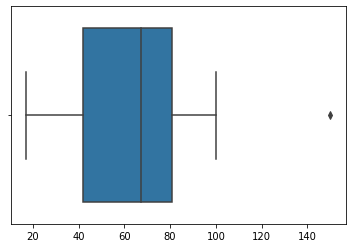

In [36]:
sns.boxplot(sal, orient='v')
plt.show()

**Задача 2**

В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?

варианты исходов: a) 2 из 2 белые и 1 из 4 белый, b) 1 из 2х белый и 2 из 4 белые, c)0 из 2х белые и 3 из 4 белые

In [ ]:
t1=combinations(8, 2)
t2=combinations(12, 4)

1 условие

In [ ]:
a1=combinations(5, 2)
a2=combinations(5, 1)
b2=combinations(7, 3)
p1=a1/t1
p2=(a2*b2)/t2
pa=p1*p2
print("2. 2 из 2 белые и 1 из 4 белый",pa)

2. 2 из 2 белые и 1 из 4 белый 0.12626262626262627


2 условие

In [ ]:
a1=combinations(5, 1)
b1=combinations(3, 1)
a2=combinations(5, 2)
b2=combinations(7, 2)
p1=(a1*b1)/t1
p2=(a2*b2)/t2
pb=p1*p2
print("2. 1 из 2х белый и 2 из 4 белые",pb)


2. 1 из 2х белый и 2 из 4 белые 0.22727272727272727


3 условие

In [ ]:
a1=combinations(3, 2)
a2=combinations(5, 3)
b2=combinations(7, 1)
p1=a1/t1
p2=(a2*b2)/t2
pc=p1*p2
print("2. 0 из 2х белые и 3 из 4 белые",pc)

2. 0 из 2х белые и 3 из 4 белые 0.01515151515151515


In [ ]:
p=pa+pb+pc
print("2.вероятность того, что 3 мяча белые",p)

2.вероятность того, что 3 мяча белые 0.3686868686868687


**Задача 3**

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?

вероятность того что случайный студент из факультета A
qa=0.25

In [ ]:
qa=0.25

вероятность того что случайный студент из факультета B qb=0.25

In [ ]:
qb=0.25

вероятность того что случайный студент из факультета C qc=0.5

In [ ]:
qc=0.5

In [ ]:
pa=0.8
pb=0.7
pc=0.9

доля сдавших студентов от общего количества поступивших

In [ ]:
pt=qa*pa+qb*pb+qc*pc
print("3. доля сдавщих студентов от общего количества поступивших",pt)


3. доля сдавщих студентов от общего количества поступивших 0.825


a)

In [ ]:
p=qa*pa/pt
print("3.a из факультета A",p)


3.a из факультета A 0.24242424242424246


In [ ]:
p=qb*pb/pt
print("3.b из факультета B",p)

3.b из факультета B 0.21212121212121213


In [ ]:
p=qc*pc/pt
print("3.c из факультета C",p)

3.c из факультета C 0.5454545454545455


**Задача 4**

Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?

In [ ]:
p1=0.1
p2=0.2
p3=0.25
q1=1-p1
q2=1-p2
q3=1-p3

a)

In [ ]:
p=p1*p2*p3
print("4.а Вероятность выхода из строя всех деталей",p)

4.а Вероятность выхода из строя всех деталей 0.005000000000000001


b)

In [ ]:
p12=p1*p2*q3
p13=p1*q2*p3
p23=q1*p2*p3
pt2=p12+p13+p23
print("4.б Вероятность выхода из строя 2х деталей",pt2)

4.б Вероятность выхода из строя 2х деталей 0.08000000000000002


c) ищем вероятность что не выйдет ни одна деталь

In [ ]:
pn=q1*q2*q3
p=1-pn
print("4.в Вероятность выхода хотябы 1й детали",p)


4.в Вероятность выхода хотябы 1й детали 0.45999999999999996


d)

In [ ]:
p1=p1*q2*q3
p2=q1*p2*q3
p3=q1*q2*p3
p=p1+p2+p3+pt2
print("4.г Вероятность выхода из строя 1-2х деталей",p)


4.г Вероятность выхода из строя 1-2х деталей 0.455
